# ML S11 Unsupervised Learning - Clustering
____

## Exercise 1: Group the different flights using the Kmeans algorithm
___

In [52]:
#Importamos las librerias:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn import preprocessing
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.datasets import make_classification
from sklearn import metrics #Import scikit-learn metrics
from sklearn.model_selection import GridSearchCV
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings("ignore")

### The columns of the dataset are:

+ Year = 2008
+ Month = 1-12
+ DayofMonth = 1-31
+ DayOfWeek = 1 (Monday) - 7 (Sunday)
+ DepTime = actual departure time (local, hhmm)
+ CRSDepTime = scheduled departure time (local, hhmm)
+ ArrTime = actual arrival time (local, hhmm)
+ CRSArrTime = scheduled arrival time (local, hhmm)
+ UniqueCarrier = unique carrier code
+ FlightNum = flight number
+ TailNum = plane tail number: aircraft registration, unique aircraft identifier
+ ActualElapsedTime = in minutes
+ CRSElapsedTime = in minutes
+ AirTime = in minutes
+ ArrDelay = arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized + + + + Reservations Systems (CRS).
+ DepDelay = departure delay, in minutes
+ Origin = origin IATA airport code
+ Dest = destination IATA airport code
+ Distance = in miles
+ TaxiIn = taxi in time, in minutes
+ TaxiOut = taxi out time in minutes
+ Cancelled = *was the flight cancelled
+ CancellationCode = reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
+ Diverted = 1 = yes, 0 = no
+ CarrierDelay = in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
+ WeatherDelay = in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
+ NASDelay = in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
+ SecurityDelay = in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
+ LateAircraftDelay = in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

___

### Cleaning Data

In [10]:
df = pd.read_csv('DelayedFlights.csv', index_col=0)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [11]:
#Check Null Values
df.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [12]:
#Grab only the flights that aren´t cancelled and diverted.

df = df[(df['Cancelled']== 0) & (df['Diverted']==0)]

In [13]:
df.shape

(1928371, 29)

In [14]:
#We are going to sample the dataset to work with only 100.000 rows
df = df[:100000]

In [15]:
#Cheking the null values
df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                  0
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime        0
CRSElapsedTime           0
AirTime                  0
ArrDelay                 0
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         34714
WeatherDelay         34714
NASDelay             34714
SecurityDelay        34714
LateAircraftDelay    34714
dtype: int64

In [16]:
#Fill the Nan values with 0.
df = df.fillna(0)

In [17]:
#Variable that only contains numerical values:
df_num= df.select_dtypes(include=['float64','int64'])

In [18]:
#Conver array to Dataframe:
df_num= pd.DataFrame(df_num)


In [19]:
df_num.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In order to work with our model properly, we have to convert all the values of the dataset to the same scale, for that we are going to use Robust Scaler preprocessing library from sklearn, but we can use Standar Scaler or other techniques depending how we want to treat the Data.

Robust Scaler use statistics that are robust to outliers. This method removes the median and scales the data in the range between the 1st quartile and the 3rd quartile. that is, between the 25th and 75th quantile range. This range is also called the interquartile range.

In [20]:
#Robust Scaler: Scale the data
 
rs = RobustScaler()
df_num=rs.fit_transform(df_num)


In the next step we will apply Principal Component Analysis or PCA to reduce the dimension of our data and be able to work with fewer columns.
PCA transforms the input data by projecting it into a lower number of dimensions called components. The components capture the variability combination of the input data through a linear of the input data's features.

In [21]:
#PCA:
pca = PCA(n_components=0.96, random_state=42)
pca_2= pca.fit_transform(df_num)


In [22]:
pca_2

array([[-2.60725219, -4.5231351 , -1.74088759],
       [-2.58442283, -4.49216457, -1.5440456 ],
       [-2.57839528, -4.48897826, -1.54776102],
       ...,
       [-2.57698228, -4.45040175, -1.58514847],
       [-2.56219477, -4.43777458, -1.45992766],
       [-2.63019884, -4.53001493,  9.09223956]])

In [23]:
#Create a dataframe with the name df_pca that will contain the components:

df_pca = pd.DataFrame({'PCA 1': pca_2[:,0], 'PCA 2':pca_2[:,1], 'PCA 3':pca_2[:,2]})
df_pca

,PCA 1,PCA 2,PCA 3
0,-2.607252,-4.523135,-1.740888
1,-2.584423,-4.492165,-1.544046
2,-2.578395,-4.488978,-1.547761
3,-2.581021,-4.484642,-1.224398
4,-2.588126,-4.490728,-1.565989
...,...,...,...
99995,-2.584318,-4.483580,-1.569822
99996,-2.585652,-4.444131,1.434067
99997,-2.576982,-4.450402,-1.585148
99998,-2.562195,-4.437775,-1.459928


Sacar columnas para reducir utliers

In [24]:
pca.explained_variance_ratio_

array([0.53925391, 0.4061546 , 0.02369101])

In [25]:
#Total Variance
pca.explained_variance_ratio_.sum()


0.9690995212580369

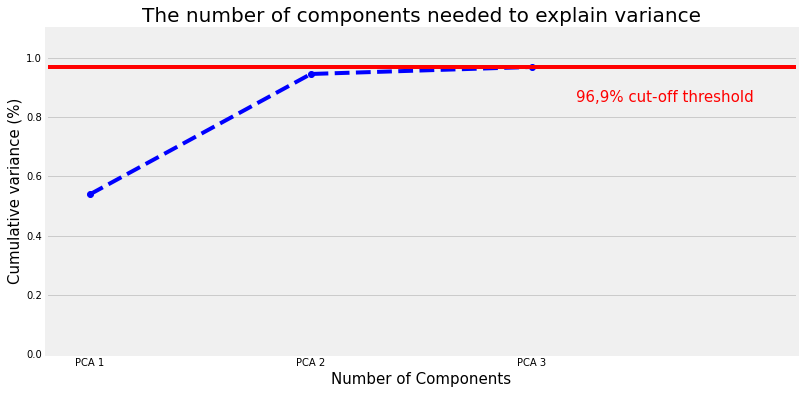

In [26]:
#Plot the variance

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
#x = np.arange(1, 11, step=1)
x = df_pca.columns
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(x, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components',  size=15)
plt.xticks(np.arange(0, 11, step=1))
plt.ylabel('Cumulative variance (%)', size=15)
plt.title('The number of components needed to explain variance', size=20)
plt.xlim(-0.2,3.2,1) #Limit the x with the numbers of our components

#Set the line and text
plt.axhline(y=0.97, color='r', linestyle='-')
plt.text(2.2, 0.85, '96,9% cut-off threshold', color = 'red', fontsize=15)

ax.grid(axis='x')

plt.show()

After reducing our columns to 3 components, we see that the 3 components explain 96% of our data and 3 is the best number of components as shown in the graph

___
### Cluster: Clustering is a series of techniques used to group data with similar characteristics forming groups or clusters, these are grouped according to the similarity of their "features" or columns.

## KMeans:

In [27]:
#Import our Model KMeans:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42)

In [28]:
#Fit the model 
kmeans.fit(df_pca)

KMeans(init='random', n_clusters=3, random_state=42)

In [29]:
#Predict 
kmeans.predict(df_pca)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [30]:
#DataFrame with predicted Labels:
labels = kmeans.labels_
df_labels = pd.DataFrame({'Predicted': labels[:]})
df_labels.head()

,Predicted
0,0
1,0
2,0
3,0
4,0


In [31]:
#Unique Values of my column Label Predicted
print(f"Unique Labels: {df_labels['Predicted'].unique()}")

Unique Labels: [0 2 1]


In [32]:
# The lowest SSE value
print('Lowest SSE value: ',kmeans.inertia_)

# Final locations of the centroid
print('Centeroid:', kmeans.cluster_centers_)

# The number of iterations required to converge
print('Number of iterations:', kmeans.n_iter_)

Lowest SSE value:  16144876.753418399
Centeroid: [[-1.66135251e+00 -2.52578752e+00  5.90819323e-03]
 [ 1.35418474e+02 -3.49822131e+00  1.35893372e-01]
 [ 6.76976740e-02  6.56213082e+01 -1.93461148e-01]]
Number of iterations: 10


### Choosing the Appropriate Number of Clusters

### Elbow Technique:
To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE.

In [33]:
#Default mode runs 10 clusters, and the we will see wich numbers of clusters are the best.

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

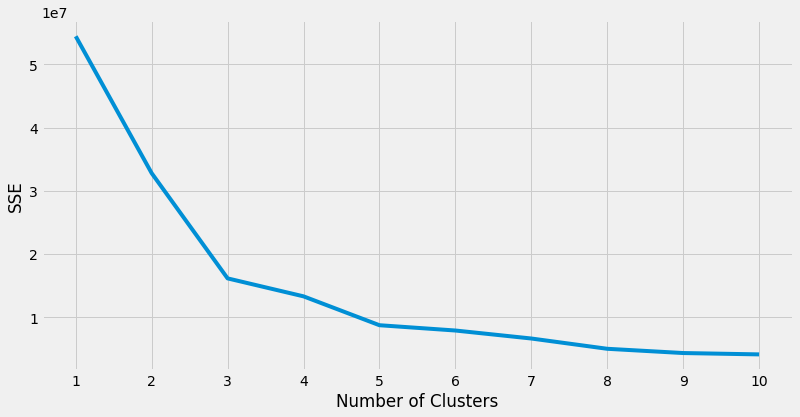

In [34]:
#Plot a chart with 10 clusters and the sse value.

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

As we can see in the chart the SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.
There’s a point where the SSE curve starts to bend known as the elbow point.

In [42]:
#With KneeLocator allow us to indentify the elbow point.

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print('Beste number of clusters: ', kl.elbow)

Beste number of clusters:  3


Although in the graph above it is clearly seen that our elbow point is 3.
With knee locator it helps us to identify our elbow, which in this case is 3.

### Silhouette Coefficients Technique:
The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

-How close the data point is to other points in the cluster

-How far away the data point is from points in other clusters

In [36]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_pca)
    score = silhouette_score(df_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

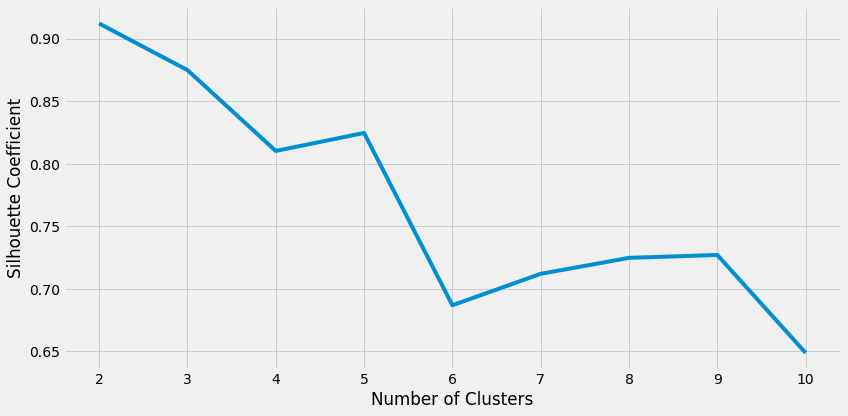

In [37]:
#Plot 10 clusterst and the SSE value of each.

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.tight_layout()
plt.show()

The Best number of clusters again is 3 with the high SSE value. 
Notice that we start at 2 clusters for silhouette coefficient.

### Once we know that our best number of clusters is 3, we reconfigure our model and predict the results.

In [38]:
#Kmeans model with 3 clusters.

kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42)
kmeans.fit(df_pca)

KMeans(init='random', n_clusters=3, random_state=42)

In [39]:
#Predict the results
kmeans.predict(df_pca)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [40]:
#DataFrame with my labels
labels = kmeans.labels_

In [44]:
#Data Frame with the labels and our original Dataframe.
df_num = pd.DataFrame(df_num)
df_num.columns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

df_predicted = df_num
df_predicted['Predicted'] = labels
df_predicted.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Predicted
99995,0.0,0.0,0.777778,0.0,0.680456,0.722628,0.553672,0.584302,0.062436,-0.851351,...,-0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
99996,0.0,0.0,0.777778,0.0,0.978602,0.934307,0.912429,0.981105,0.064133,0.567568,...,1.000000,0.7,0.0,0.0,2.888889,0.0,0.0,0.0,0.0,0
99997,0.0,0.0,0.777778,0.0,0.981455,1.051095,-1.559322,-1.530523,0.064472,2.297297,...,0.333333,0.6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
99998,0.0,0.0,0.777778,0.0,-0.717546,-0.708029,-0.710452,-0.726744,0.069902,-0.243243,...,0.333333,0.9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
99999,0.0,0.0,0.777778,0.0,-0.854494,-1.021898,-0.675141,-0.866279,0.078045,0.851351,...,0.000000,-0.1,0.0,0.0,10.333333,0.0,0.0,0.0,0.0,0


In [105]:
#Add to the original Data Frame the predicted labels.

df['Predicted'] = labels


In [103]:
#Add to the PCA DataFrame the predicted labels-
df_pca= df_pca
df_pca['Predicted']= labels
df_pca['UniqueCarrier'] = df['UniqueCarrier'].values
df_pca

,PCA 1,PCA 2,PCA 3,Predicted,UniqueCarrier
0,-2.607252,-4.523135,-1.740888,0,WN
1,-2.584423,-4.492165,-1.544046,0,WN
2,-2.578395,-4.488978,-1.547761,0,WN
3,-2.581021,-4.484642,-1.224398,0,WN
4,-2.588126,-4.490728,-1.565989,0,WN
...,...,...,...,...,...
99995,-2.584318,-4.483580,-1.569822,0,DL
99996,-2.585652,-4.444131,1.434067,0,DL
99997,-2.576982,-4.450402,-1.585148,0,DL
99998,-2.562195,-4.437775,-1.459928,0,DL


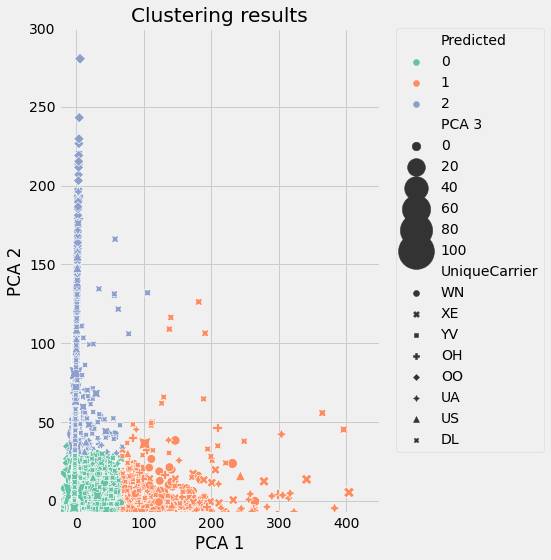

In [106]:
#Scatter plot with PCA values and clusters.
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
data=df_pca,
x="PCA 1",
y="PCA 2",
#s=50,
hue="Predicted",
size="PCA 3",
sizes=(50, 1500),
style="UniqueCarrier",
palette="Set2")

scat.set_title("Clustering results")
plt.xlim(-25, 450)
plt.ylim(-8, 300)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.0)
plt.tight_layout()
plt.show()

Here we can clearly see how the 3 clusters are differentiated and how they are composed. Cluster number 0 (it is really our cluster 1) is composed mostly by component number 1 because we see it located along the X axis and less by component 2 already that up does not rise so much.
Cluster number 1 (our cluester 2), on the other hand, is made up more by PCA 2 than 1.
Cluster number 3 is more evenly composed of PCA 1 and PCA 2.
___

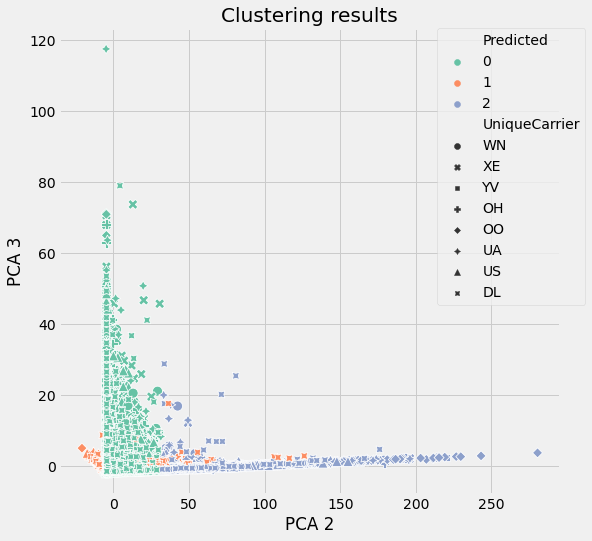

In [107]:

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

    
scat = sns.scatterplot(
data=df_pca,
x="PCA 2",
y="PCA 3",
s=100,
#size="PCA 1", sizes=(500, 2000),
hue="Predicted",
style="UniqueCarrier",
palette="Set2")
scat.set_title("Clustering results")
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.0)

plt.show()

Cluster number 1 (0 in our code) is composed mostly of component number 3 since the graph shows that it extends more along the y-axis than the x-axis.
Cluster number 2 (1 in the code) is hardly noticeable in the graph, but it is mostly made up of component number 2 and to a less by component 3.
Finally the cluster number 3 (2 in the code) is clearly seen to be composed mostly of component number 2 because the points are along that axis.
___

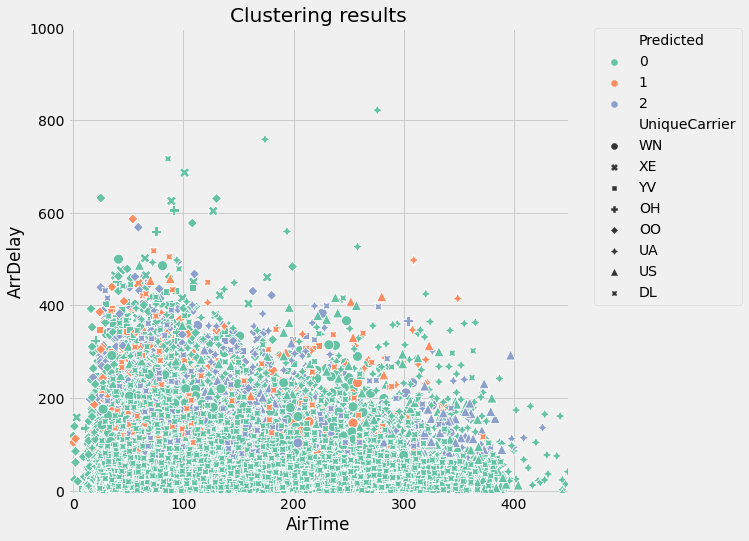

In [108]:
#Scatter plot with PCA values and clusters.
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
data=df,
x="AirTime",
y="ArrDelay",
s=100,
hue="Predicted",
style="UniqueCarrier",
palette="Set2")
scat.set_title("Clustering results")
plt.xlim(-5, 450)
plt.ylim(-8, 1000)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.0)

plt.show()

We can see how the points are decreasing in this graph. There is hardly any difference between clusters and airlines, they are all overlapping. 
The more Airtime the flights tend to have, the less Arrival Delay. An interesting fact since the shortest flights are the most likely to have ArrDelay.
___

Text(0.5, 0, 'PCA 3')

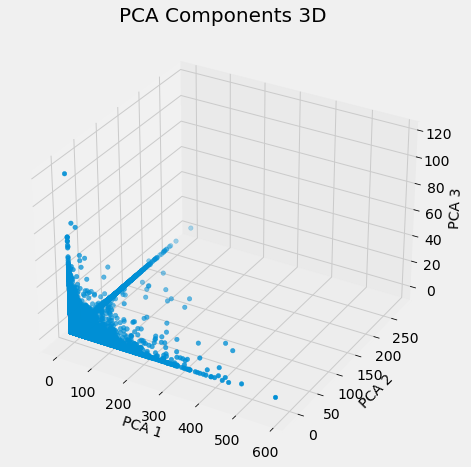

In [109]:

# Variables
x = df_pca['PCA 1']
y = df_pca['PCA 2']
z = df_pca['PCA 3']
 
 #Bidimensional Chart
fig = plt.figure()
 
 # Covert 2d to 3d
axes3d = Axes3D(fig)
 
axes3d.scatter3D(x,y,z)

plt.title("PCA Components 3D", fontsize=20)
plt.xlabel("PCA 1", fontsize= 14)
plt.ylabel("PCA 2", fontsize= 14)
axes3d.set_zlabel('PCA 3', fontsize= 14)





In this multidimensional graph we see that most of the points are distributed along component 1, followed by component number 2 that covers the second highest concentration and finally, component number 3 that only shows a line of points finer along that axis.
____

### Some further analysis:

Filtering the dataframe by each cluster and using the describe method we can obtain very valuable information and know what type of values each cluster has. We will compare the two dataframes, the original with all its features and the Dataframe of our PCA components.

In [110]:
# Describe cluster 1: 
df_pca[df_pca['Predicted'] == 0].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PCA 1,95112.0,-1.66,5.57,-3.03,-2.59,-2.58,-2.52,66.67
PCA 2,95112.0,-2.53,5.17,-6.47,-4.50,-4.46,-4.23,31.53
PCA 3,95112.0,0.01,3.73,-1.96,-1.56,-1.32,-0.13,117.57
Predicted,95112.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [111]:
# Describe cluster 2: 
df_pca[df_pca['Predicted'] == 1].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PCA 1,1165.0,135.42,69.44,67.18,85.28,113.39,165.40,584.43
PCA 2,1165.0,-3.50,12.23,-20.84,-8.41,-7.01,-4.05,126.19
PCA 3,1165.0,0.14,1.28,-1.01,-0.52,-0.16,0.47,25.69
Predicted,1165.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00


In [112]:
# Describe cluster 3: 
df_pca[df_pca['Predicted'] == 2].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PCA 1,3723.0,0.07,5.00,-1.54,-1.17,-0.72,-0.05,105.78
PCA 2,3723.0,65.62,30.42,30.15,42.78,57.25,79.24,280.50
PCA 3,3723.0,-0.19,1.23,-1.12,-0.70,-0.42,-0.01,28.82
Predicted,3723.0,2.00,0.00,2.00,2.00,2.00,2.00,2.00


In [126]:
#total of each cluster.
total_clusters = df['Predicted'].value_counts()

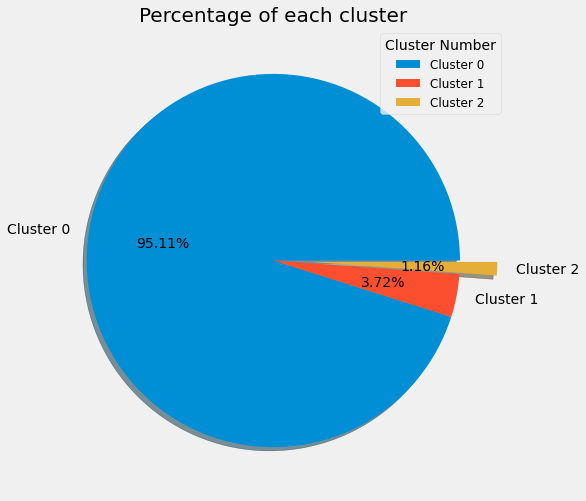

In [129]:
#Donut Chart with the total of each cluster.
plt.figure(figsize=(8,8))
labels = ["Cluster 0", "Cluster 1", "Cluster 2"]
explode = [0, 0 , 0.2]
plt.pie(total_clusters, labels = labels, autopct='%.2f%%', explode=explode, shadow=True)

plt.title("Percentage of each cluster",fontsize=20)
plt.legend(title= "Cluster Number", fontsize=12, loc="best")

plt.show()

We see that cluster number 1 (cluster 0 in our code) is the group that has the most flights with similar characteristics, grouping 95.11% of the flights.
In cluster number 2 (1 un our code) we see that there are fewer flights grouped with a percentage of 3.72% of the total flights in our sample.
Cluster 3 is the cluster with the lowest percentage of grouped flights, occupying 1.16% of all flights.
Making this type of graph allows us to see in a simple way how our k means algorithm classified our flights.

____

In [130]:
# Describe cluster 1: 
df[df['Predicted'] == 0].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Year,95112.0,2008.00,0.00,2008.0,2008.0,2008.0,2008.0,2008.0
Month,95112.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0
DayofMonth,95112.0,15.30,9.46,1.0,6.0,17.0,24.0,31.0
DayOfWeek,95112.0,3.93,1.91,1.0,2.0,4.0,5.0,7.0
DepTime,95112.0,1512.74,449.37,1.0,1154.0,1541.0,1858.0,2400.0
CRSDepTime,95112.0,1465.27,425.03,30.0,1130.0,1505.0,1815.0,2359.0
ArrTime,95112.0,1609.27,532.85,1.0,1315.0,1707.0,2025.0,2400.0
CRSArrTime,95112.0,1624.47,463.31,1.0,1319.0,1657.0,2010.0,2359.0
FlightNum,95112.0,2389.56,2110.17,1.0,712.0,1625.0,3427.0,7829.0
ActualElapsedTime,95112.0,123.39,67.94,24.0,75.0,104.0,149.0,623.0


In [131]:
# Describe cluster 2: 
df[df['Predicted'] == 1].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Year,1165.0,2008.00,0.00,2008.0,2008.0,2008.0,2008.0,2008.0
Month,1165.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0
DayofMonth,1165.0,16.56,9.45,1.0,7.0,17.0,27.0,31.0
DayOfWeek,1165.0,3.70,2.12,1.0,1.0,4.0,5.0,7.0
DepTime,1165.0,1503.51,492.50,1.0,1150.0,1517.0,1912.0,2359.0
CRSDepTime,1165.0,1352.80,439.75,59.0,1010.0,1330.0,1725.0,2253.0
ArrTime,1165.0,1517.42,614.94,1.0,1227.0,1619.0,1955.0,2400.0
CRSArrTime,1165.0,1516.60,451.92,2.0,1200.0,1534.0,1900.0,2359.0
FlightNum,1165.0,3448.59,2110.07,6.0,1542.0,3748.0,5316.0,7829.0
ActualElapsedTime,1165.0,135.68,70.22,27.0,86.0,117.0,163.0,454.0


In [132]:
# Describe cluster 3: 
df[df['Predicted'] == 2].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Year,3723.0,2008.00,0.00,2008.0,2008.0,2008.0,2008.0,2008.0
Month,3723.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0
DayofMonth,3723.0,17.47,9.57,1.0,8.0,21.0,26.5,31.0
DayOfWeek,3723.0,3.44,1.84,1.0,2.0,3.0,5.0,7.0
DepTime,3723.0,1615.12,379.26,1.0,1339.5,1641.0,1917.0,2357.0
CRSDepTime,3723.0,1432.67,341.89,600.0,1154.0,1434.0,1714.0,2357.0
ArrTime,3723.0,1731.59,500.41,1.0,1504.0,1834.0,2110.0,2400.0
CRSArrTime,3723.0,1599.86,356.40,2.0,1326.0,1625.0,1910.0,2359.0
FlightNum,3723.0,3650.44,2558.25,1.0,972.5,3146.0,5961.0,7825.0
ActualElapsedTime,3723.0,141.81,73.56,32.0,93.0,124.0,171.0,693.0


### We will analyze the following 4 features according to their averages:

+ Distance
+ Air Time 
+ Arr Delay (Arrival Delay)
+ Dep Delay (Departure Delay)
___


+ Cluster 1 : Cluster number 1 is the one with the longest flight distance of 705 miles, but with the shortest delay times in ArrDelay (37 minutes) and DepDelay (39 minutes). Which means that the longer the flight times, the smaller the departure and arrival delays tend to be.


+ Cluster 2: This cluster, according to the average distance traveled, is in the middle of cluster 1 and 3, with a similar flight time but slightly less than the others (94 minutes) but with the greatest delays in departures and arrivals.


+ Cluster 3: It is the one with the shortest average distance traveled (573 miles), an Air Time similar to the other clusters (98 minutes) but as described in cluster number one, by having less flight distance traveled, the delay with respect to departures and arrivals it is quite higher compared to cluster 1 and very similar to the values of cluster 2 with an Arr Delay of 146 minutes and a Departure Delay of 121 minutes.


### Conlusion: 
In this work we did a series of steps to be able to group our dataset of flights in such a way that those with similar characteristics are grouped:

- First, the data was cleaned by filtering the flights that were not canceled or diverted, then the records that contained Nan were imputed with 0, since if we did it with the mean or the median, we could make the mistake of assigning delays to flights that were not actually delayed, once the data was clean we took a sample of 100,000 records to make our processing faster.

- Once our dataset was clean, we converted all the variables to the same scale with Robust Scaler and used the PCA (principal components analysis) technique with 95% variance to reduce the number of features, so that our Kmeans algorithm can work. best.

- Finally, we apply our Kmeans model with the best number of clusters to our database, in order to predict and classify the flights into 3 groups or clusters, with similar characteristics, in order to analyze them later.

